## Programming workflow for VISUALIZING ECO ADCP DATA
### © In_coast lab author: C. Hart, 2024-01-05

In [10]:
# Import necessary libraries
import easygui
import pandas as pd
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
sys.path.append(r'c:\users\s1495478\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [11]:
# Parameters
Devicedepth = 1.05
upperlayerdepth = 0.6
middlelayerdepth = 0.75
lowerlayerdepth = 0.9

upperlayer = Devicedepth - lowerlayerdepth
middlelayer = lowerlayerdepth - middlelayerdepth
lowerlayer = middlelayerdepth - upperlayerdepth

print(upperlayer, middlelayer, lowerlayer)

depths = 1.05 - (upperlayerdepth - lowerlayer*0.5), 1.05 - (middlelayerdepth - middlelayer*0.5), 1.05 - (lowerlayerdepth - upperlayer*0.5)

# depths = lowerlayerdepth - lowerlayer*0, middlelayerdepth - middlelayer*0, upperlayerdepth - Upperlayer*0
# depths = upperlayerdepth - Upperlayer, middlelayerdepth - middlelayer, lowerlayerdepth - lowerlayer
# depths = lowerlayerdepth, middlelayerdepth, upperlayerdepth

print(depths)

0.15000000000000002 0.15000000000000002 0.15000000000000002
(0.5250000000000001, 0.375, 0.2250000000000001)


In [12]:
# read and format ADCP DATA
file_path = r'C:\Users\S1495478\Documents\ADCP\MV_20231004\MAV_ECO_20231004_MagCor_formatted.csv'
df = pd.read_csv(file_path, delimiter=',')
print(df.columns)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')

Index(['DateTime', 'Upper speed', 'Upper direction', 'Middle speed',
       'Middle direction', 'Lower speed', 'Lower direction', 'Temperature',
       'Depth', 'Tilt'],
      dtype='object')


In [13]:
DIR = 'Upper direction', 'Middle direction', 'Lower direction'
SPEED = 'Upper speed', 'Middle speed', 'Lower speed'

for i in range(0, 3):
    dir_column = pd.DataFrame({
        'dir_column': df[DIR[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, dir_column], axis=1)
    
for i in range(0, 3):
    speed_column = pd.DataFrame({
        'speed_column': df[SPEED[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, speed_column], axis=1)

3 3477
3 3477


C:\Users\S1495478\AppData\Local\Temp\ipykernel_26124\3519928508.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nan_mask = speed_column == 'Nan'
C:\Users\S1495478\AppData\Local\Temp\ipykernel_26124\3519928508.py:37: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X, Y, s=500, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')


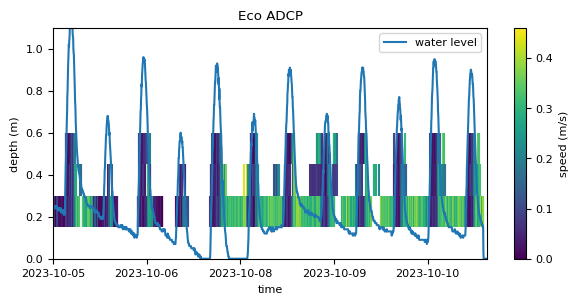

In [14]:
# df = df.resample('T').interpolate()
df['speed_column'] = df['speed_column'].fillna(float(-10))
df['dir_column'] = df['dir_column'].fillna(float(-10))
df['speed_column'] = df['speed_column'].astype(float)
df['dir_column'] = df['dir_column'].astype(float)

dir_column = df['dir_column'].to_numpy()
speed_column = df['speed_column'].to_numpy()

speed_column = np.transpose(speed_column)
dir_column = np.transpose(dir_column)

print(len(speed_column), len(speed_column[0]))
print(len(dir_column), len(dir_column[0]))

nan_mask = speed_column == 'Nan'
speed_column[nan_mask] = (float(-10)) 
dir_column[nan_mask] = (float(-10))

threshold = -9
mask = np.array(speed_column) < threshold
masked_array = np.ma.masked_less(speed_column, threshold)
# masked_array = np.ma.masked_less(dir_column, threshold)

fig, ax1 = plt.subplots(figsize=(7, 3))
plt.rcParams['font.size'] = 8  # You can adjust the size as needed

# Print the resulting array
# Assuming x and y axes correspond to indices
x_axis = df.index
y_axis = depths

# Create a meshgrid from x and y axes
X, Y = np.meshgrid(x_axis, y_axis)

# Plot the filled contours
plt.scatter(X, Y, s=500, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')

# ax2 = ax1.twinx()
plt.plot(df['Depth'], label='water level')

num_ticks = 10

date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

ax1.set_xticks(ticks=tick_dates)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='both', which='major', labelsize=8)

# Add color bar for reference
# plt.colorbar(label = 'direction \u00B0')
plt.colorbar(label = 'speed (m/s)')

# Label the axes
plt.xlabel('time')
plt.ylabel('depth (m)')
plt.title('Eco ADCP')

# Set x-axis and y-axis limits
plt.xlim(x_axis[0], x_axis[int(1790)])  # Adjust as needed
plt.ylim(0, 1.1)  # Adjust as needed
# plt.ylim(depths[0]+upperlayer*1, 0)  # Adjust as needed

# plt.ylim(depths[0]-lowerlayer*1, depths[2]+upperlayer*1)  # Adjust as needed

plt.legend()
# Show the plot
plt.show()

C:\Users\S1495478\AppData\Local\Temp\ipykernel_22632\3318318309.py:9: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(X, Y, s=3100, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')


NameError: name 'plot' is not defined

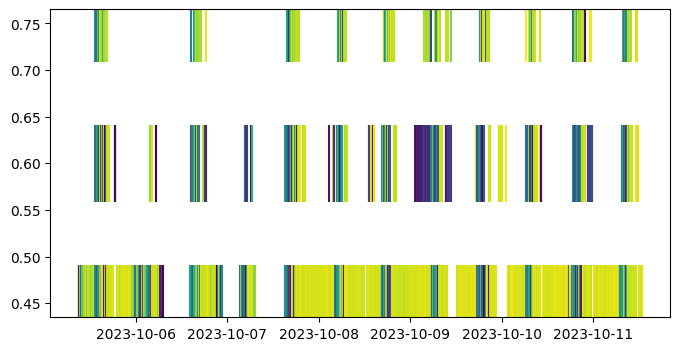

In [102]:
# mask = speed_column >0

# print(mask)
# print(speed_column)

# masked_array = np.ma.masked_array(speed_column, mask)
fig, ax1 = plt.subplots(figsize=(8, 4), sharex=True)

ax1.scatter(X, Y, s=3100, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')
# ax2 = ax1.twinx()
plot(df['Depth'], label='water level')
# plt.colorbar(label = 'speed (m/s)')


                     speed_column  speed_column  speed_column
DateTime                                                     
2023-10-05 09:00:00         -10.0         -10.0          0.12
2023-10-05 09:01:00         -10.0         -10.0        -10.00
2023-10-05 09:02:00         -10.0         -10.0        -10.00
2023-10-05 09:03:00         -10.0         -10.0        -10.00
2023-10-05 09:04:00         -10.0         -10.0        -10.00
...                           ...           ...           ...
2023-10-17 10:36:00         -10.0         -10.0        -10.00
2023-10-17 10:37:00         -10.0         -10.0        -10.00
2023-10-17 10:38:00         -10.0         -10.0        -10.00
2023-10-17 10:39:00         -10.0         -10.0        -10.00
2023-10-17 10:40:00         -10.0         -10.0        -10.00

[17381 rows x 3 columns]


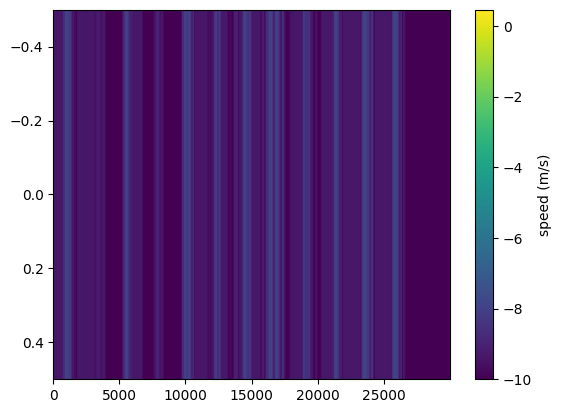

In [191]:
print(df['speed_column'])

column_values = df['speed_column'][0:10000].values.reshape(1, -1)

# Create an imshow plot for the selected column
plt.imshow(column_values, cmap='viridis', aspect='auto')
plt.colorbar(label = 'speed (m/s)')


3 3


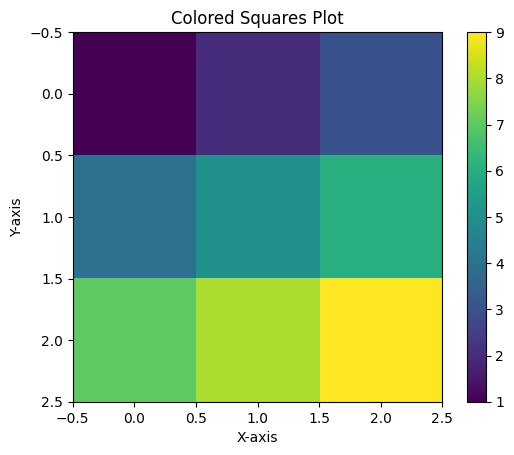

In [169]:
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
print(len(data), len(data[0]))

# Create a plot with colors representing values
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar for reference
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Colored Squares Plot')

# Display the plot
plt.show()

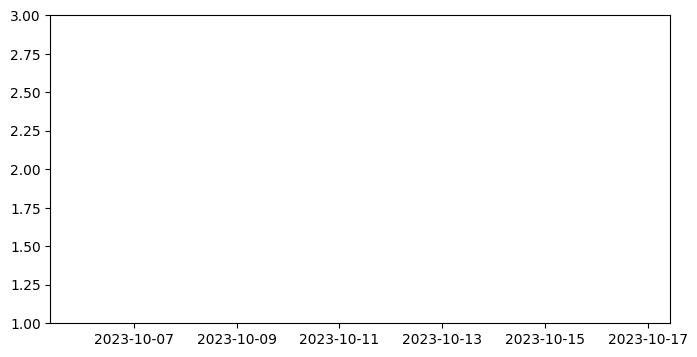

In [158]:

fig, ax1 = plt.subplots(figsize=(8, 4))

# Print the resulting array
# Assuming x and y axes correspond to indices
x_axis = df.index
y_axis = [1,2,3]

# Create a meshgrid from x and y axes
X, Y = np.meshgrid(x_axis, y_axis)

# Plot the filled contours
plt.contour(X, Y, masked_array[:][0:len(df.index)-1], cmap='viridis')

# num_ticks = 6

# date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
# tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
# tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

# ax1.set_xticks(ticks=tick_dates)
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax1.tick_params(axis='both', which='major', labelsize=8)

# # Add color bar for reference
# plt.colorbar(label = 'speed (m/s)')

# # Label the axes
# plt.xlabel('time')
# plt.ylabel('distance (m)')

# # Set x-axis and y-axis limits
# # plt.xlim(x_axis[6800], x_axis[int(9000)])  # Adjust as needed
# # plt.ylim(y_axis[0], y_axis[4])  # Adjust as needed

# # Show the plot
plt.show()

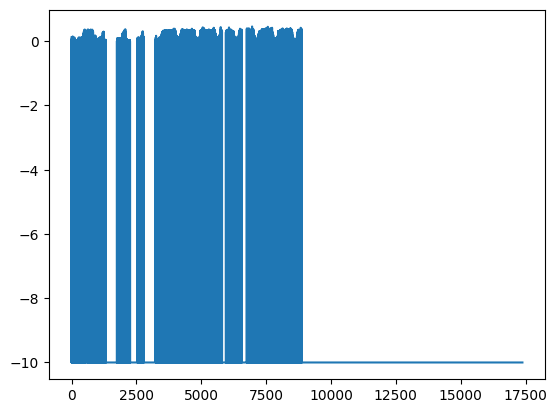

In [145]:
plt.plot(masked_array[2,:])

In [138]:
print(len(masked_array), len(masked_array[0]))

3 17381
